In [2]:
# Importing the necessary Python libraries to examine the Excel workbook structure

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder




In [19]:
# Load the Excel workbook to find out the names of the sheets it contains

excel_path = './tt_global_human_day.xlsx'

sheet_names = pd.ExcelFile(excel_path).sheet_names



sheet_names

['global_human_day',
 'country_regions',
 'global_economic_activity',
 'all_countries',
 'codebook Intro',
 'codebook_all_countries',
 'codebook_country_regions',
 'codebook_global_human_day',
 'codebook_global_economic_active']

In [4]:
# Dictionary to hold all the data frames
data_frames = {}
# Loop through each sheet name and read it into a DataFrame, then store it in the dictionary
for sheet in sheet_names:
    data_frames[sheet] = pd.read_excel(excel_path, sheet_name=sheet)
# Show the list of data frames that have been loaded

data_frames.keys()

dict_keys(['global_human_day', 'country_regions', 'global_economic_activity', 'all_countries', 'codebook Intro', 'codebook_all_countries', 'codebook_country_regions', 'codebook_global_human_day', 'codebook_global_economic_active'])

In [5]:
# Perform initial EDA on the first data sheet 'global_human_day'
# Display basic statistics and first few rows to understand its structure and contents

# Basic statistics
basic_stats_global_human_day = data_frames['global_human_day'].describe()

# First few rows
first_rows_global_human_day = data_frames['global_human_day'].head()

basic_stats_global_human_day, first_rows_global_human_day


(       hoursPerDay  uncertainty
 count    24.000000    24.000000
 mean      1.000000     0.096250
 std       1.826529     0.098591
 min       0.010000     0.000000
 25%       0.200000     0.027500
 50%       0.585000     0.060000
 75%       0.952500     0.140000
 max       9.100000     0.390000,
          Subcategory  hoursPerDay  uncertainty
 0  Active recreation         0.42         0.05
 1         Allocation         0.91         0.06
 2          Artifacts         0.42         0.02
 3          Buildings         0.22         0.08
 4             Energy         0.04         0.01)

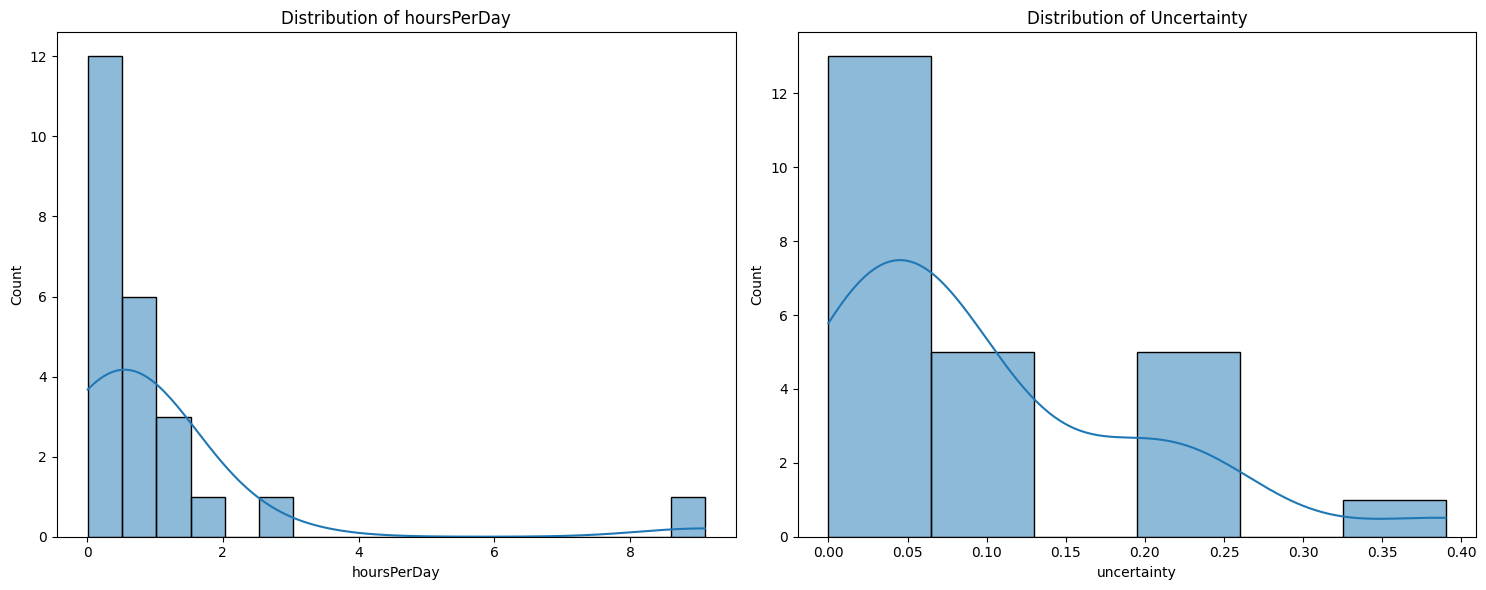

(Subcategory    0
 hoursPerDay    0
 uncertainty    0
 dtype: int64,
 Subcategory     object
 hoursPerDay    float64
 uncertainty    float64
 dtype: object)

In [6]:
# Perform more extensive EDA on 'global_human_day'
# Let's check for missing values, data types, and generate some visualizations to better understand the distribution of data.
# Check for missing values
missing_values = data_frames['global_human_day'].isnull().sum()

# Check data types
data_types = data_frames['global_human_day'].dtypes

# Create visualizations
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Histogram for 'hoursPerDay'
sns.histplot(data_frames['global_human_day']['hoursPerDay'], kde=True, ax=axes[0])
axes[0].set_title('Distribution of hoursPerDay')

# Histogram for 'uncertainty'
sns.histplot(data_frames['global_human_day']['uncertainty'], kde=True, ax=axes[1])
axes[1].set_title('Distribution of Uncertainty')

plt.tight_layout()
plt.show()

missing_values, data_types


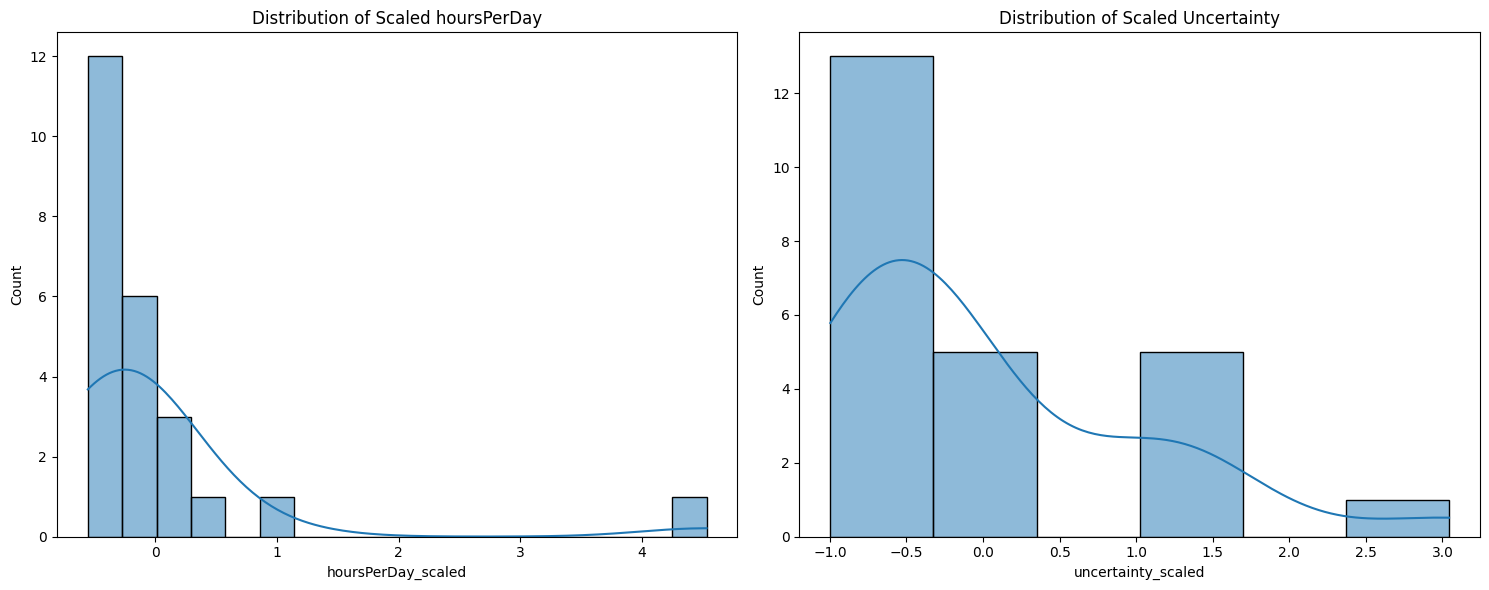

,Subcategory,hoursPerDay,uncertainty,hoursPerDay_scaled,uncertainty_scaled,confidence_interval_lower,confidence_interval_upper
0,Active recreation,0.42,0.05,-0.324372,-0.479201,0.37,0.47
1,Allocation,0.91,0.06,-0.050334,-0.375590,0.85,0.97
2,Artifacts,0.42,0.02,-0.324372,-0.790034,0.40,0.44
3,Buildings,0.22,0.08,-0.436224,-0.168368,0.14,0.30
4,Energy,0.04,0.01,-0.536891,-0.893645,0.03,0.05


In [7]:
# Proceeding with the suggested data transformations for 'global_human_day'

# 1. Standardize the 'hoursPerDay' and 'uncertainty' columns
scaler = StandardScaler()
data_frames['global_human_day'][['hoursPerDay_scaled', 'uncertainty_scaled']] = scaler.fit_transform(
    data_frames['global_human_day'][['hoursPerDay', 'uncertainty']])

# 2. Create a new feature that represents the 'confidence interval'
# Confidence Interval = hoursPerDay ± uncertainty
data_frames['global_human_day']['confidence_interval_lower'] = data_frames['global_human_day']['hoursPerDay'] - data_frames['global_human_day']['uncertainty']
data_frames['global_human_day']['confidence_interval_upper'] = data_frames['global_human_day']['hoursPerDay'] + data_frames['global_human_day']['uncertainty']

# 3. Visualize the transformed data
# Creating subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plotting the scaled 'hoursPerDay'
sns.histplot(data_frames['global_human_day']['hoursPerDay_scaled'], kde=True, ax=axes[0])
axes[0].set_title('Distribution of Scaled hoursPerDay')

# Plotting the scaled 'uncertainty'
sns.histplot(data_frames['global_human_day']['uncertainty_scaled'], kde=True, ax=axes[1])
axes[1].set_title('Distribution of Scaled Uncertainty')

plt.tight_layout()
plt.show()

# Show first few rows of the transformed data
transformed_data_preview = data_frames['global_human_day'].head()

transformed_data_preview


In [8]:
# Perform initial EDA on the next data sheet 'country_regions'
# Display basic statistics and first few rows to understand its structure and contents

# Basic statistics for 'country_regions'
basic_stats_country_regions = data_frames['country_regions'].describe()

# First few rows for 'country_regions'
first_rows_country_regions = data_frames['country_regions'].head()

basic_stats_country_regions, first_rows_country_regions


(         M49_code
 count  248.000000
 mean   435.544355
 std    252.047627
 min      4.000000
 25%    221.000000
 50%    436.000000
 75%    652.500000
 max    894.000000,
   region_code      region_name country_name  M49_code country_iso2  \
 0        AF_N  Northern Africa      Algeria        12           DZ   
 1        AF_N  Northern Africa        Egypt       818           EG   
 2        AF_N  Northern Africa        Libya       434           LY   
 3        AF_N  Northern Africa      Morocco       504           MA   
 4        AF_N  Northern Africa        Sudan       729           SD   
 
   country_iso3 alt_country_name                        alt_country_name1  \
 0          DZA          Algeria  People’s Democratic Republic of Algeria   
 1          EGY            Egypt                   Arab Republic of Egypt   
 2          LBY            Libya                           State of Libya   
 3          MAR          Morocco                       Kingdom of Morocco   
 4          SDN

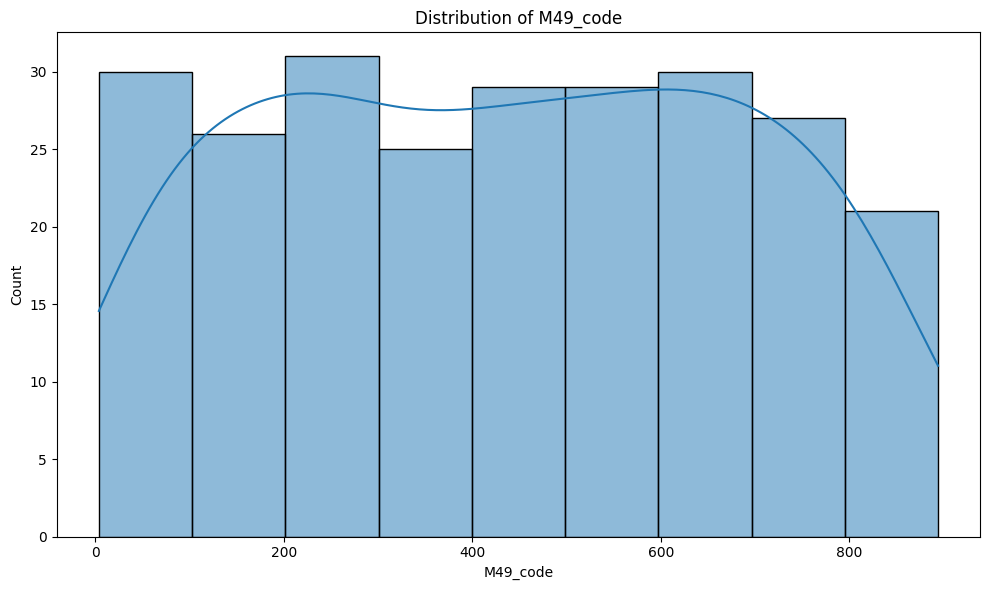

(region_code            0
 region_name            0
 country_name           0
 M49_code               0
 country_iso2           1
 country_iso3           0
 alt_country_name      14
 alt_country_name1     33
 alt_country_name2    163
 alt_country_name3    214
 alt_country_name4    235
 alt_country_name5    243
 alt_country_name6    246
 other_code1          232
 other_code2          245
 dtype: int64,
 region_code          object
 region_name          object
 country_name         object
 M49_code              int64
 country_iso2         object
 country_iso3         object
 alt_country_name     object
 alt_country_name1    object
 alt_country_name2    object
 alt_country_name3    object
 alt_country_name4    object
 alt_country_name5    object
 alt_country_name6    object
 other_code1          object
 other_code2          object
 dtype: object)

In [9]:
# Perform more extensive EDA on 'country_regions'
# Check for missing values, data types, and generate some visualizations to better understand the data

# Check for missing values in 'country_regions'
missing_values_country_regions = data_frames['country_regions'].isnull().sum()

# Check data types in 'country_regions'
data_types_country_regions = data_frames['country_regions'].dtypes

# Create visualizations to understand the data distribution
# Since 'M49_code' is the only numerical column, let's create a histogram for it
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data_frames['country_regions']['M49_code'], kde=True, ax=ax)
ax.set_title('Distribution of M49_code')

plt.tight_layout()
plt.show()

missing_values_country_regions, data_types_country_regions


In [10]:
# Perform the specified data transformations for 'country_regions'

# 1. Drop the columns 'other_code1' and 'other_code2'
data_frames['country_regions'].drop(['other_code1', 'other_code2'], axis=1, inplace=True)

# 2. Encode Categorical Columns
# We'll use label encoding for 'region_code', 'region_name', and 'country_name'
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for column in ['region_code', 'region_name', 'country_name']:
    data_frames['country_regions'][f'{column}_encoded'] = label_encoder.fit_transform(data_frames['country_regions'][column])

# 3. Normalize Numerical Column 'M49_code'
# We'll use standard scaling for this
scaler = StandardScaler()
data_frames['country_regions']['M49_code_scaled'] = scaler.fit_transform(data_frames['country_regions'][['M49_code']])

# Show first few rows of the transformed data
transformed_data_preview_country_regions = data_frames['country_regions'].head()

transformed_data_preview_country_regions


,region_code,region_name,country_name,M49_code,country_iso2,country_iso3,alt_country_name,alt_country_name1,alt_country_name2,alt_country_name3,alt_country_name4,alt_country_name5,alt_country_name6,region_code_encoded,region_name_encoded,country_name_encoded,M49_code_scaled
0,AF_N,Northern Africa,Algeria,12,DZ,DZA,Algeria,People’s Democratic Republic of Algeria,NaN,NaN,NaN,NaN,NaN,2,8,2,-1.683812
1,AF_N,Northern Africa,Egypt,818,EG,EGY,Egypt,Arab Republic of Egypt,NaN,NaN,NaN,NaN,NaN,2,8,67,1.520463
2,AF_N,Northern Africa,Libya,434,LY,LBY,Libya,State of Libya,NaN,NaN,NaN,NaN,NaN,2,8,126,-0.006140
3,AF_N,Northern Africa,Morocco,504,MA,MAR,Morocco,Kingdom of Morocco,NaN,NaN,NaN,NaN,NaN,2,8,147,0.272147
4,AF_N,Northern Africa,Sudan,729,SD,SDN,Sudan,Republic of the Sudan,The Sudan,NaN,NaN,NaN,NaN,2,8,210,1.166641


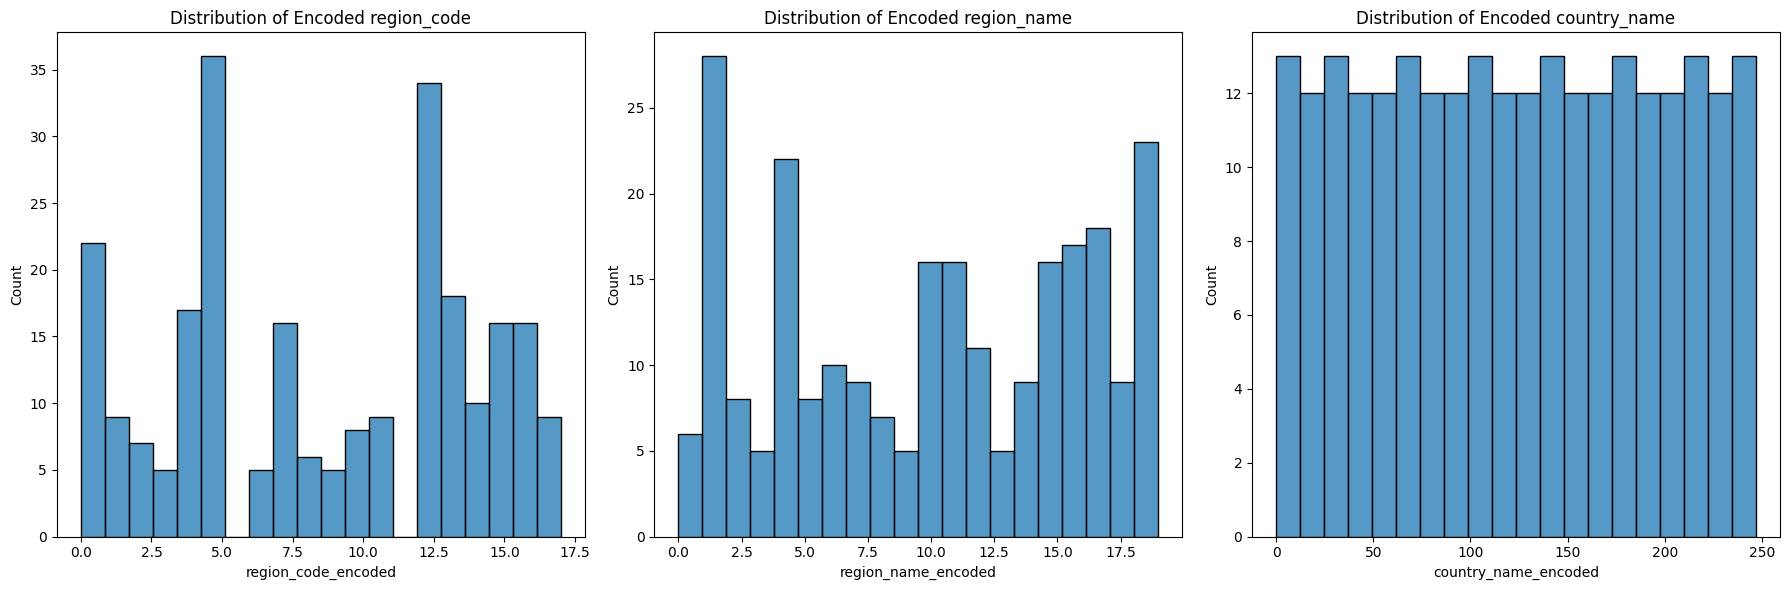

In [11]:
# Plotting the encoded data to visualize the transformations

# Creating subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plotting the distribution of encoded 'region_code'
sns.histplot(data_frames['country_regions']['region_code_encoded'], kde=False, ax=axes[0], bins=20)
axes[0].set_title('Distribution of Encoded region_code')

# Plotting the distribution of encoded 'region_name'
sns.histplot(data_frames['country_regions']['region_name_encoded'], kde=False, ax=axes[1], bins=20)
axes[1].set_title('Distribution of Encoded region_name')

# Plotting the distribution of encoded 'country_name'
sns.histplot(data_frames['country_regions']['country_name_encoded'], kde=False, ax=axes[2], bins=20)
axes[2].set_title('Distribution of Encoded country_name')

plt.tight_layout()
plt.show()


In [ ]:
# Save the transformed data back into Excel format, but as new sheets

# Define the Excel writer
""" output_excel_path = './transformed_data_sheets.xlsx'
excel_writer = pd.ExcelWriter(output_excel_path, engine='xlsxwriter')

# Save the transformed data sheets
data_frames['global_human_day'].to_excel(excel_writer, sheet_name='global_human_day_transformed', index=False)
data_frames['country_regions'].to_excel(excel_writer, sheet_name='country_regions_transformed', index=False)

# Save the other sheets as they are
for sheet, df in data_frames.items():
    if sheet not in ['global_human_day', 'country_regions']:  # these are already saved in transformed form
        df.to_excel(excel_writer, sheet_name=sheet, index=False)

# Save the Excel file
excel_writer.save()

output_excel_path """


In [ ]:
# Perform initial EDA on the next data sheet 'global_economic_activity'
# Display basic statistics and first few rows to understand its structure and contents

# Basic statistics for 'global_economic_activity'
basic_stats_global_economic_activity = data_frames['global_economic_activity'].describe()

# First few rows for 'global_economic_activity'
first_rows_global_economic_activity = data_frames['global_economic_activity'].head()

basic_stats_global_economic_activity, first_rows_global_economic_activity


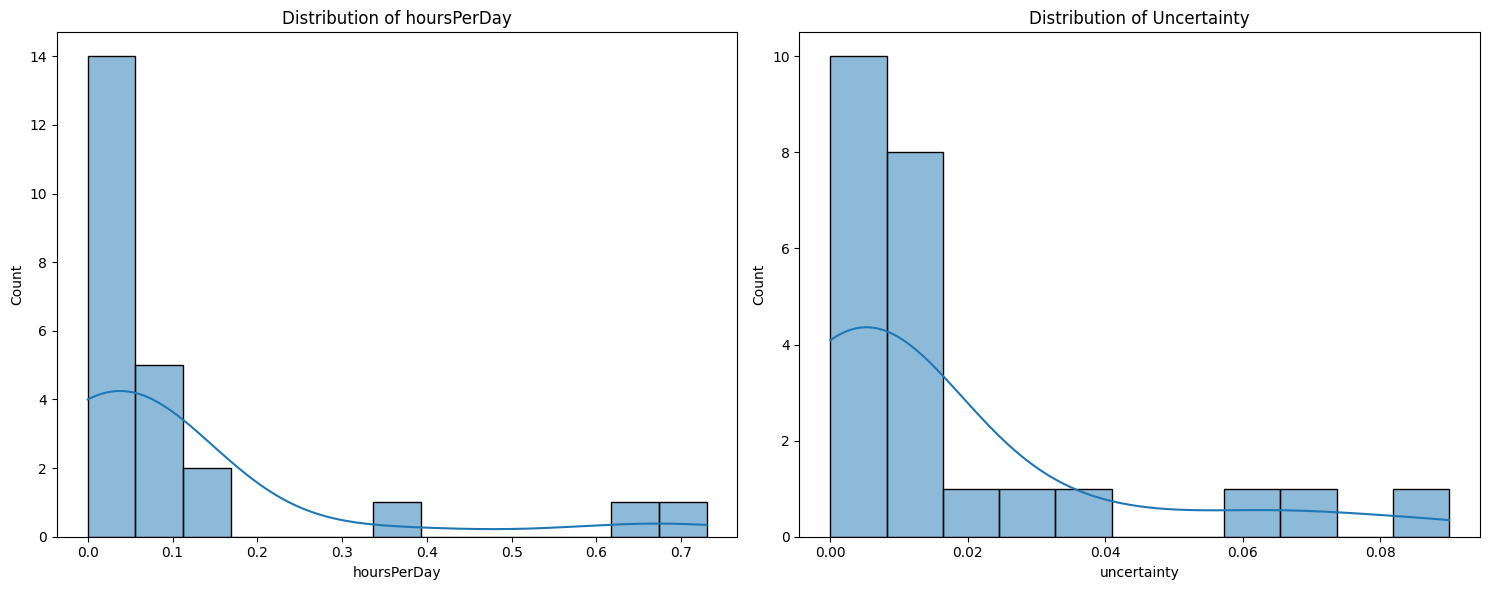

(Subcategory    0
 hoursPerDay    0
 uncertainty    0
 dtype: int64,
 Subcategory     object
 hoursPerDay    float64
 uncertainty    float64
 dtype: object)

In [14]:
# Perform more extensive EDA on 'global_economic_activity'
# Check for missing values, data types, and generate some visualizations to better understand the data

# Check for missing values in 'global_economic_activity'
missing_values_global_economic_activity = data_frames['global_economic_activity'].isnull().sum()

# Check data types in 'global_economic_activity'
data_types_global_economic_activity = data_frames['global_economic_activity'].dtypes

# Create visualizations to understand the data distribution
# Creating subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plotting the distribution of 'hoursPerDay'
sns.histplot(data_frames['global_economic_activity']['hoursPerDay'], kde=True, ax=axes[0])
axes[0].set_title('Distribution of hoursPerDay')

# Plotting the distribution of 'uncertainty'
sns.histplot(data_frames['global_economic_activity']['uncertainty'], kde=True, ax=axes[1])
axes[1].set_title('Distribution of Uncertainty')

plt.tight_layout()
plt.show()

missing_values_global_economic_activity, data_types_global_economic_activity


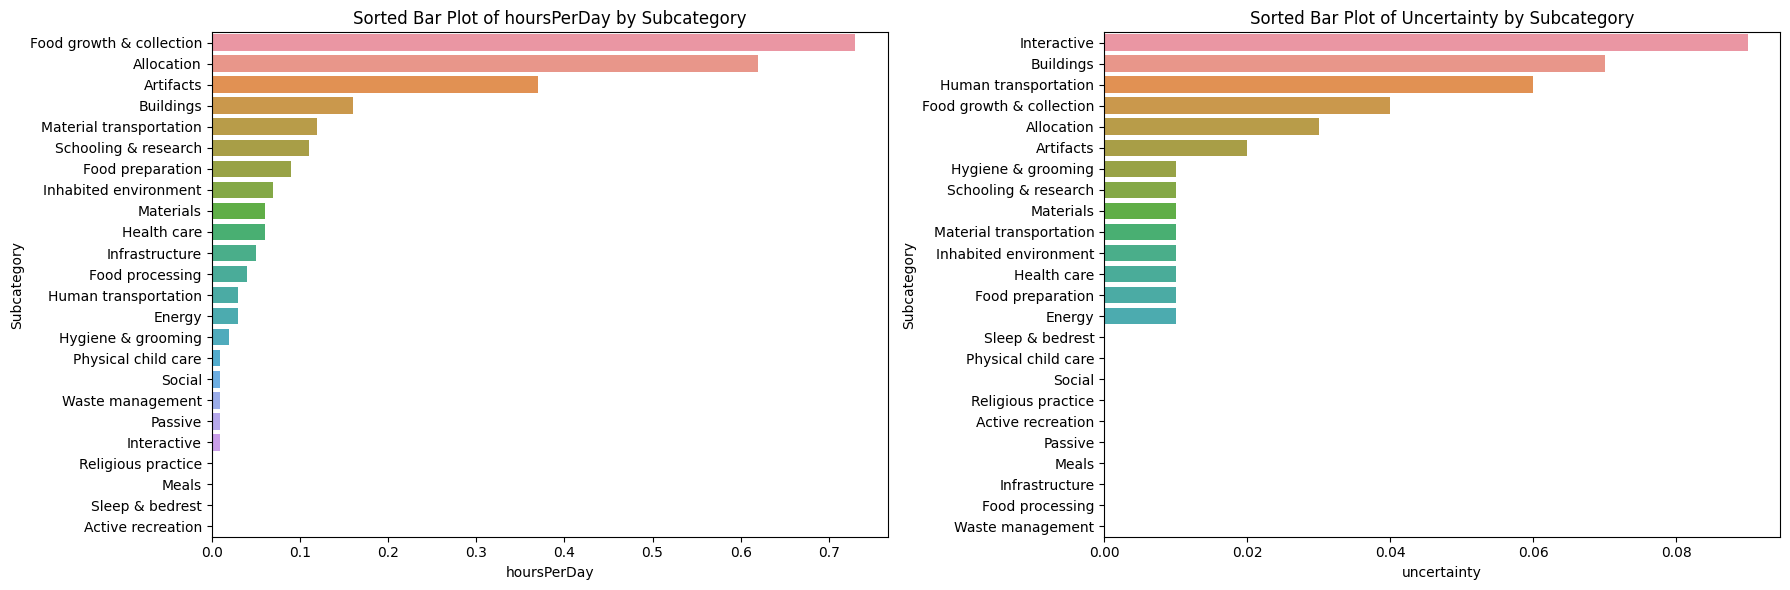

In [16]:
# Sort the bar plots by their x-axis values for better readability and comparison

# Creating subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Sorted bar plot for 'hoursPerDay' by 'Subcategory'
sns.barplot(x='hoursPerDay', y='Subcategory', data=data_frames['global_economic_activity'].sort_values('hoursPerDay',ascending=False), ax=axes[0])
axes[0].set_title('Sorted Bar Plot of hoursPerDay by Subcategory')

# Sorted bar plot for 'uncertainty' by 'Subcategory'
sns.barplot(x='uncertainty', y='Subcategory', data=data_frames['global_economic_activity'].sort_values('uncertainty',ascending=False), ax=axes[1])
axes[1].set_title('Sorted Bar Plot of Uncertainty by Subcategory')

plt.tight_layout()
plt.show()


In [17]:
# Proceeding with the suggested data transformations for 'global_economic_activity'

# 1. Standardize the 'hoursPerDay' and 'uncertainty' columns
data_frames['global_economic_activity'][['hoursPerDay_scaled', 'uncertainty_scaled']] = scaler.fit_transform(
    data_frames['global_economic_activity'][['hoursPerDay', 'uncertainty']])

# 2. Create a new feature that represents the 'confidence interval'
# Confidence Interval = hoursPerDay ± uncertainty
data_frames['global_economic_activity']['confidence_interval_lower'] = data_frames['global_economic_activity']['hoursPerDay'] - data_frames['global_economic_activity']['uncertainty']
data_frames['global_economic_activity']['confidence_interval_upper'] = data_frames['global_economic_activity']['hoursPerDay'] + data_frames['global_economic_activity']['uncertainty']

# Show first few rows of the transformed data
transformed_data_preview_global_economic_activity = data_frames['global_economic_activity'].head()

transformed_data_preview_global_economic_activity


,Subcategory,hoursPerDay,uncertainty,hoursPerDay_scaled,uncertainty_scaled,confidence_interval_lower,confidence_interval_upper
0,Active recreation,0.00,0.00,-0.578047,-0.673717,0.00,0.00
1,Allocation,0.62,0.03,2.717483,0.570068,0.59,0.65
2,Artifacts,0.37,0.02,1.388640,0.155473,0.35,0.39
3,Buildings,0.16,0.07,0.272413,2.228448,0.09,0.23
4,Energy,0.03,0.01,-0.418585,-0.259122,0.02,0.04


In [20]:
# Perform initial EDA on the final data sheet 'all_counties'
# Display basic statistics and first few rows to understand its structure and contents

# Basic statistics for 'all_counties'
basic_stats_all_countries = data_frames['all_countries'].describe()

# First few rows for 'all_counties'
first_rows_all_countries = data_frames['all_countries'].head()

basic_stats_all_countries, first_rows_all_countries


(         population  hoursPerDayCombined  uncertaintyCombined
 count  4.776000e+03          4776.000000          4776.000000
 mean   3.707879e+07             1.000272             0.390837
 std    1.393249e+08             1.769804             1.051639
 min    9.711500e+04             0.000000             0.000000
 25%    1.905020e+06             0.150000             0.002200
 50%    8.243849e+06             0.520000             0.041600
 75%    2.582349e+07             1.060000             0.229600
 max    1.366418e+09            10.210000             6.998000,
             Category               Subcategory country_iso3 region_code  \
 0     Food provision          Food preparation          ABW        AM_C   
 1     Food provision  Food growth & collection          ABW        AM_C   
 2     Food provision           Food processing          ABW        AM_C   
 3  Nonfood provision                 Materials          ABW        AM_C   
 4  Nonfood provision                    Energy     

In [21]:
# Perform initial EDA on the final data sheet 'all_countries'
# Display basic statistics and first few rows to understand its structure and contents

# Basic statistics for 'all_countries'
basic_stats_all_countries = data_frames['all_countries'].describe()

# First few rows for 'all_countries'
first_rows_all_countries = data_frames['all_countries'].head()

basic_stats_all_countries, first_rows_all_countries


(         population  hoursPerDayCombined  uncertaintyCombined
 count  4.776000e+03          4776.000000          4776.000000
 mean   3.707879e+07             1.000272             0.390837
 std    1.393249e+08             1.769804             1.051639
 min    9.711500e+04             0.000000             0.000000
 25%    1.905020e+06             0.150000             0.002200
 50%    8.243849e+06             0.520000             0.041600
 75%    2.582349e+07             1.060000             0.229600
 max    1.366418e+09            10.210000             6.998000,
             Category               Subcategory country_iso3 region_code  \
 0     Food provision          Food preparation          ABW        AM_C   
 1     Food provision  Food growth & collection          ABW        AM_C   
 2     Food provision           Food processing          ABW        AM_C   
 3  Nonfood provision                 Materials          ABW        AM_C   
 4  Nonfood provision                    Energy     

In [22]:
# Proceeding with the suggested data transformations for 'all_countries'

# 1. Standardize the 'population', 'hoursPerDayCombined', and 'uncertaintyCombined' columns
data_frames['all_countries'][['population_scaled', 'hoursPerDayCombined_scaled', 'uncertaintyCombined_scaled']] = scaler.fit_transform(
    data_frames['all_countries'][['population', 'hoursPerDayCombined', 'uncertaintyCombined']])

# 2. Encode Categorical Columns
# We'll use label encoding for 'Category', 'Subcategory', 'country_iso3', and 'region_code'
for column in ['Category', 'Subcategory', 'country_iso3', 'region_code']:
    data_frames['all_countries'][f'{column}_encoded'] = label_encoder.fit_transform(data_frames['all_countries'][column])

# 3. Create a new feature that represents the 'confidence interval'
# Confidence Interval = hoursPerDayCombined ± uncertaintyCombined
data_frames['all_countries']['confidence_interval_lower'] = data_frames['all_countries']['hoursPerDayCombined'] - data_frames['all_countries']['uncertaintyCombined']
data_frames['all_countries']['confidence_interval_upper'] = data_frames['all_countries']['hoursPerDayCombined'] + data_frames['all_countries']['uncertaintyCombined']

# Show first few rows of the transformed data
transformed_data_preview_all_countries = data_frames['all_countries'].head()

transformed_data_preview_all_countries


,Category,Subcategory,country_iso3,region_code,population,hoursPerDayCombined,uncertaintyCombined,population_scaled,hoursPerDayCombined_scaled,uncertaintyCombined_scaled,Category_encoded,Subcategory_encoded,country_iso3_encoded,region_code_encoded,confidence_interval_lower,confidence_interval_upper
0,Food provision,Food preparation,ABW,AM_C,101665,1.47,0.2376,-0.26543,0.265440,-0.145728,2,6,0,5,1.2324,1.7076
1,Food provision,Food growth & collection,ABW,AM_C,101665,0.17,0.0269,-0.26543,-0.469182,-0.346103,2,5,0,5,0.1431,0.1969
2,Food provision,Food processing,ABW,AM_C,101665,0.00,0.0075,-0.26543,-0.565247,-0.364552,2,7,0,5,-0.0075,0.0075
3,Nonfood provision,Materials,ABW,AM_C,101665,0.03,0.0021,-0.26543,-0.548295,-0.369687,4,15,0,5,0.0279,0.0321
4,Nonfood provision,Energy,ABW,AM_C,101665,0.05,0.0036,-0.26543,-0.536993,-0.368261,4,4,0,5,0.0464,0.0536


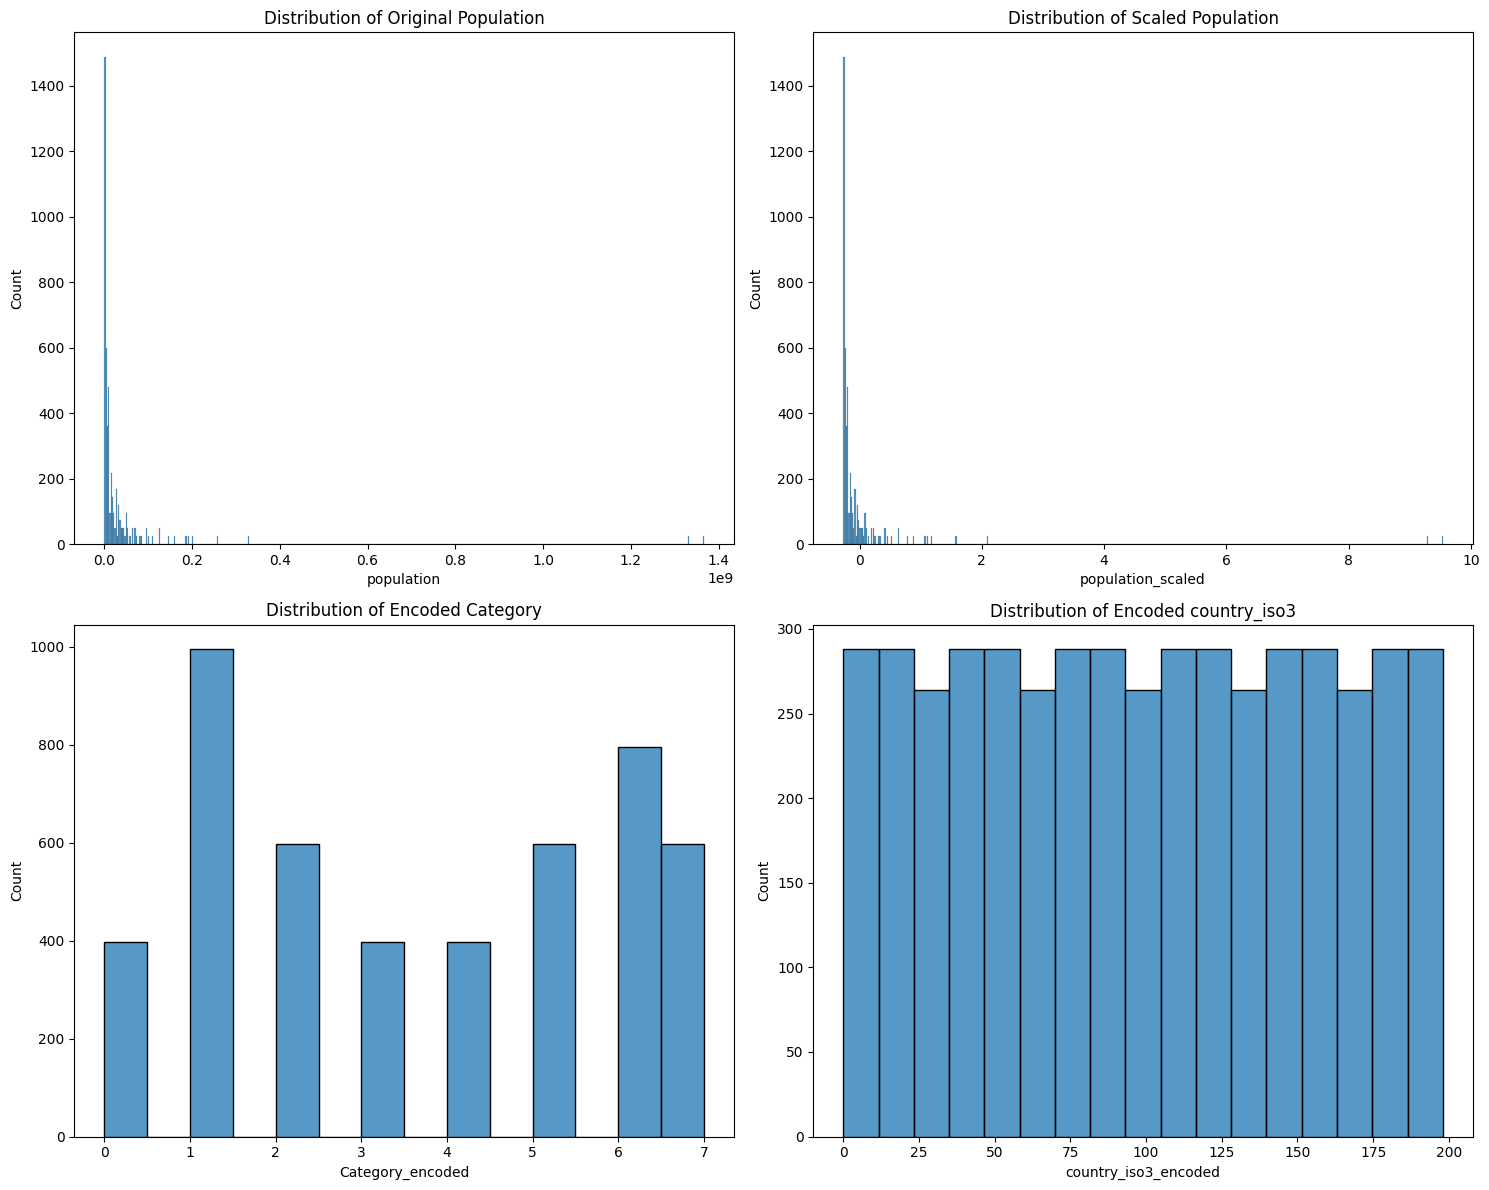

In [23]:
# Create some plots to visualize the effects of the transformations made on 'all_countries' data
# 1. Histograms of a couple of original and scaled numerical columns
# 2. Histograms of a couple of encoded categorical columns

# Creating subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plotting the distribution of original 'population'
sns.histplot(data_frames['all_countries']['population'], kde=False, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Original Population')

# Plotting the distribution of scaled 'population'
sns.histplot(data_frames['all_countries']['population_scaled'], kde=False, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Scaled Population')

# Plotting the distribution of encoded 'Category'
sns.histplot(data_frames['all_countries']['Category_encoded'], kde=False, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Encoded Category')

# Plotting the distribution of encoded 'country_iso3'
sns.histplot(data_frames['all_countries']['country_iso3_encoded'], kde=False, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Encoded country_iso3')

plt.tight_layout()
plt.show()


In [26]:
import sqlite3

# Create SQLite database and connection
db_path = './tt_global_human_day.sqlite3'
conn = sqlite3.connect(db_path)

# Load the transformed data sheets into the SQLite database
for sheet, df in data_frames.items():
    df.to_sql(f"{sheet}_transformed", conn, if_exists='replace', index=False)

# Close the connection
conn.close()

db_path


'./tt_global_human_day.sqlite3'